# Process discriminator

In [22]:
import base
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from utils.leadlag import leadlag
from esig import tosig
from gpsig import kernels
import gpflow
import tensorflow as tf

import process_discriminator
import evaluation
from importlib import reload 
reload(process_discriminator)
reload(evaluation)

<module 'evaluation' from '../src\\evaluation.py'>

## Generate paths

 We will generate Geometric Brownian Motions. We define three sets, `set1`, `set2` and  `set3`. `set1` and `set3` come from the same distribution and `set2` is not.

In [23]:
def generate(mu, sigma, n_points=50):
    """Generate GBM."""
    
    dt = 1 / np.sqrt(n_points)
    
    timeline = np.linspace(0, 1, n_points)
    bm = dt * np.r_[0., np.random.randn(n_points - 1).cumsum()]
    path = np.exp((mu - sigma ** 2 / 2.) * timeline + sigma * bm)
    
    return leadlag(path)

100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 5287.36it/s]


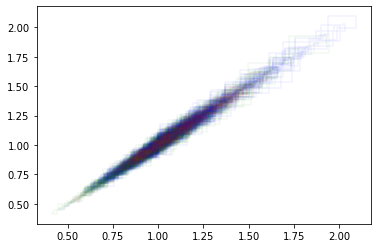

In [24]:
set1 = [generate(mu=0.02, sigma=0.3) for _ in tqdm(range(100))]
set2 = [generate(mu=0.02, sigma=0.2) for _ in tqdm(range(100))]
set3 = [generate(mu=0.02, sigma=0.3) for _ in tqdm(range(100))]

# for path1, path2, path3 in zip(set1[:100], set2[:100], set3[:100]):
#     plt.plot(*path1.T, "b", alpha=0.05)
#     plt.plot(*path2.T, "r", alpha=0.05)
#     plt.plot(*path3.T, "g", alpha=0.05)

## Apply test

In [27]:
TU0_soft_100 = []
TU1_soft_100 = []
TU0_hard_100  = []
TU1_hard_100  = []
TU0_soft_1000 = []
TU1_soft_1000 = []
TU0_hard_1000  = []
TU1_hard_1000  = []
for i in range(10):
    print(i)
    set1 = [generate(mu=0.02, sigma=0.3) for _ in tqdm(range(1000))]
    set2 = [generate(mu=0.02, sigma=0.2) for _ in tqdm(range(1000))]
    set3 = [generate(mu=0.02, sigma=0.3) for _ in tqdm(range(1000))]
    
    result, TU = process_discriminator.test(set1[0:100], set2[0:100], order=3, confidence_level=0.99)
    TU0_soft_100.append(TU)
    result, TU = process_discriminator.test(set1[0:100], set3[0:100], order=3, confidence_level=0.99)
    TU1_soft_100.append(TU)
    
    result, TU = evaluation.test(set1[0:100], set2[0:100], order=3, confidence_level=0.99)
    TU0_hard_100.append(TU)
    result, TU = evaluation.test(set1[0:100], set3[0:100], order=3, confidence_level=0.99)
    TU1_hard_100.append(TU)
    
    result, TU = process_discriminator.test(set1, set2, order=3, confidence_level=0.99)
    TU0_soft_1000.append(TU)
    result, TU = process_discriminator.test(set1, set3, order=3, confidence_level=0.99)
    TU1_soft_1000.append(TU)
    
    result, TU = evaluation.test(set1, set2, order=3, confidence_level=0.99)
    TU0_hard_1000.append(TU)
    result, TU = evaluation.test(set1, set3, order=3, confidence_level=0.99)
    TU1_hard_1000.append(TU)

100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 5460.30it/s]



c: 0.040100545339935616
TU: 0.00526271004628498
m: 100



c: 0.040100545339935616
TU: 0.000778221686069891
m: 100



c: 0.040100545339935616
TU: 0.02045175239911723
m: 100



c: 0.040100545339935616
TU: 0.006370387903403607
m: 100



c: 0.01268090586890476
TU: 0.002017360162561488
m: 1000



c: 0.01268090586890476
TU: 5.910603944503379e-06
m: 1000



c: 0.01268090586890476
TU: 0.004805750317478097
m: 1000


100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 5830.26it/s]


c: 0.01268090586890476
TU: 0.0006789050292583809
m: 1000



100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 5681.74it/s]



c: 0.040100545339935616
TU: 0.001990293887069061
m: 100



c: 0.040100545339935616
TU: 0.0005424756240612894
m: 100



c: 0.040100545339935616
TU: 0.004623281485728992
m: 100



c: 0.040100545339935616
TU: 0.01254651000659246
m: 100



c: 0.01268090586890476
TU: 0.0022698461437848927
m: 1000



c: 0.01268090586890476
TU: 0.0009198670560062183
m: 1000



c: 0.01268090586890476
TU: 0.006784413746866225
m: 1000


100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 5829.27it/s]


c: 0.01268090586890476
TU: 0.004059995683545203
m: 1000



100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 5829.54it/s]



c: 0.040100545339935616
TU: 0.003932969064206926
m: 100



c: 0.040100545339935616
TU: 0.0010050101858141147
m: 100



c: 0.040100545339935616
TU: 0.008977044135652701
m: 100



c: 0.040100545339935616
TU: 0.0033886140687187094
m: 100



c: 0.01268090586890476
TU: 0.0017926305425985944
m: 1000



c: 0.01268090586890476
TU: 0.0004703077109171616
m: 1000



c: 0.01268090586890476
TU: 0.0006583225987442098
m: 1000


 60%|██████████████████████████████████████████████▎                              | 602/1000 [00:00<00:00, 5973.94it/s]


c: 0.01268090586890476
TU: 0.0014492150562994688
m: 1000


100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 5863.60it/s]



c: 0.040100545339935616
TU: 0.002433194523868476
m: 100



c: 0.040100545339935616
TU: 0.0018509813551430554
m: 100



c: 0.040100545339935616
TU: 0.010150927281360467
m: 100



c: 0.040100545339935616
TU: 0.0031681022122729274
m: 100



c: 0.01268090586890476
TU: 0.0017512373123516056
m: 1000



c: 0.01268090586890476
TU: 7.121552508815299e-05
m: 1000



c: 0.01268090586890476
TU: 0.0009753267846206448
m: 1000


100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 6538.06it/s]


c: 0.01268090586890476
TU: 0.0005611857522245245
m: 1000



100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 6324.38it/s]



c: 0.040100545339935616
TU: 0.0030289002029157963
m: 100



c: 0.040100545339935616
TU: 0.0002900965251244614
m: 100



c: 0.040100545339935616
TU: 0.00506780060651435
m: 100



c: 0.040100545339935616
TU: 0.004178129303426648
m: 100



c: 0.01268090586890476
TU: 0.003258336698380493
m: 1000



c: 0.01268090586890476
TU: 0.00014949680432563284
m: 1000



c: 0.01268090586890476
TU: 0.013843672475268853
m: 1000


100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 6111.81it/s]


c: 0.01268090586890476
TU: 0.0008715468445736896
m: 1000



100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 5807.52it/s]



c: 0.040100545339935616
TU: 0.0019918190116019474
m: 100



c: 0.040100545339935616
TU: 0.002273367180730901
m: 100



c: 0.040100545339935616
TU: 0.005849236336931796
m: 100



c: 0.040100545339935616
TU: 0.01616253234890186
m: 100



c: 0.01268090586890476
TU: 0.002333979978252021
m: 1000



c: 0.01268090586890476
TU: 2.456626261482242e-05
m: 1000



c: 0.01268090586890476
TU: 0.007839945313869556
m: 1000


 58%|████████████████████████████████████████████▋                                | 580/1000 [00:00<00:00, 5755.04it/s]


c: 0.01268090586890476
TU: 0.00016178364877728058
m: 1000


100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 6189.37it/s]



c: 0.040100545339935616
TU: 0.003736822040981469
m: 100



c: 0.040100545339935616
TU: 0.0005296286984943777
m: 100



c: 0.040100545339935616
TU: 0.022857020437556663
m: 100



c: 0.040100545339935616
TU: 0.006782506055686088
m: 100



c: 0.01268090586890476
TU: 0.0022817235024370497
m: 1000



c: 0.01268090586890476
TU: 0.00015433241409823495
m: 1000



c: 0.01268090586890476
TU: 0.006223488562621782
m: 1000


100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 6033.89it/s]


c: 0.01268090586890476
TU: 0.0016024234786784497
m: 1000



100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 5827.19it/s]



c: 0.040100545339935616
TU: 0.005193964376399851
m: 100



c: 0.040100545339935616
TU: 0.00039074052861742814
m: 100



c: 0.040100545339935616
TU: 0.031956709252917825
m: 100



c: 0.040100545339935616
TU: 0.00907135304893325
m: 100



c: 0.01268090586890476
TU: 0.0018819121029696184
m: 1000



c: 0.01268090586890476
TU: 0.0001522342375079866
m: 1000



c: 0.01268090586890476
TU: 0.0031470752262325874
m: 1000


100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 5817.50it/s]


c: 0.01268090586890476
TU: 0.0006069086662328083
m: 1000



100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 5863.63it/s]



c: 0.040100545339935616
TU: 0.004330075267048095
m: 100



c: 0.040100545339935616
TU: 0.005718742579503999
m: 100



c: 0.040100545339935616
TU: 0.015619229577221283
m: 100



c: 0.040100545339935616
TU: 0.03251236736548124
m: 100



c: 0.01268090586890476
TU: 0.002231145640120946
m: 1000



c: 0.01268090586890476
TU: 0.00022121284261888974
m: 1000



c: 0.01268090586890476
TU: 0.004557678037400148
m: 1000


 60%|█████████████████████████████████████████████▉                               | 597/1000 [00:00<00:00, 5744.78it/s]


c: 0.01268090586890476
TU: 0.0018780816729244698
m: 1000


100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 5800.13it/s]



c: 0.040100545339935616
TU: 0.0029712542273441223
m: 100



c: 0.040100545339935616
TU: 0.0031914501493104375
m: 100



c: 0.040100545339935616
TU: 0.0032502762792159245
m: 100



c: 0.040100545339935616
TU: 0.00984082884431059
m: 100



c: 0.01268090586890476
TU: 0.001785000730687436
m: 1000



c: 0.01268090586890476
TU: 0.00015607032672182442
m: 1000



c: 0.01268090586890476
TU: 0.0014188666020538143
m: 1000



c: 0.01268090586890476
TU: 0.0009559203676841044
m: 1000


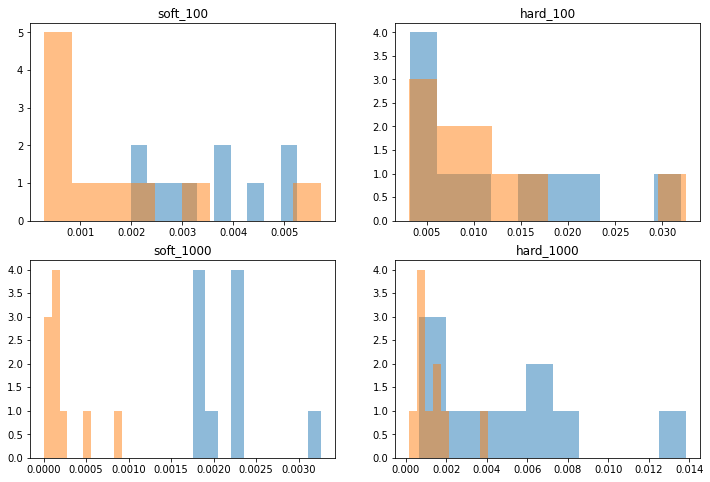

In [28]:
plt.figure(figsize=(12, 8))
plt.subplot(2,2,1)
plt.hist(TU0_soft_100,alpha = 0.5)
plt.hist(TU1_soft_100,alpha = 0.5)
plt.title('soft_100')
plt.subplot(2,2,2)
plt.hist(TU0_hard_100,alpha = 0.5)
plt.hist(TU1_hard_100,alpha = 0.5)
plt.title('hard_100')
plt.subplot(2,2,3)
plt.hist(TU0_soft_1000,alpha = 0.5)
plt.hist(TU1_soft_1000,alpha = 0.5)
plt.title('soft_1000')
plt.subplot(2,2,4)
plt.hist(TU0_hard_1000,alpha = 0.5)
plt.hist(TU1_hard_1000,alpha = 0.5)
plt.title('hard_1000')
plt.show()

# Signature kernel method

In [11]:
TU0_lift = []
TU1_lift = []

In [13]:

num_levels = 3
num_lags = 0
kern = kernels.SignatureKernel(base_kernel = gpflow.kernels.Exponential(), \
                               num_levels = num_levels, order = num_levels, num_lags = num_lags)
for i in range(3):
    set1 = [generate(mu=0.02, sigma=0.3) for _ in tqdm(range(100))]
    set2 = [generate(mu=0.02, sigma=0.2) for _ in tqdm(range(100))]
    set3 = [generate(mu=0.02, sigma=0.3) for _ in tqdm(range(100))]
    TU = evaluation.sig_TU2(tf.constant(set1),tf.constant(set2),kern)
    TU0_lift.append(TU)
    TU = evaluation.sig_TU2(tf.constant(set1),tf.constant(set3),kern)
    TU1_lift.append(TU)

100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 8296.68it/s]


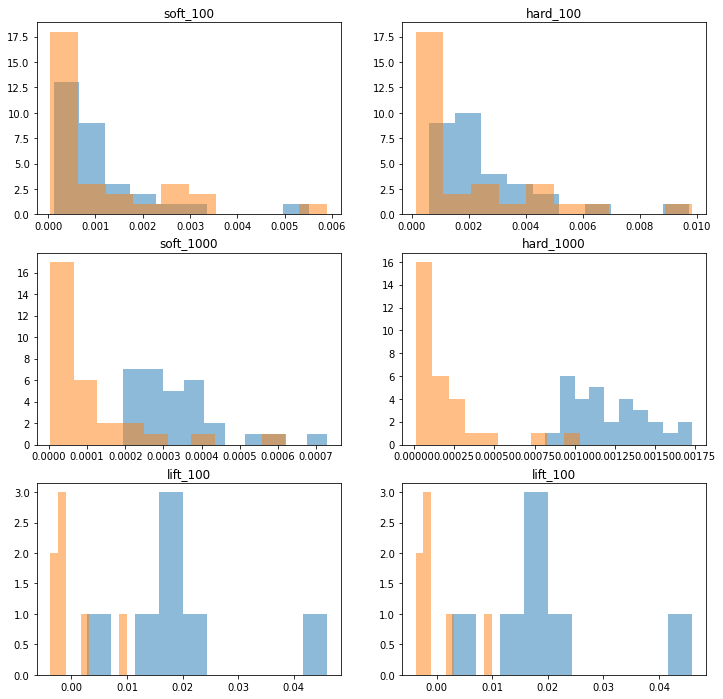

In [12]:
plt.figure(figsize=(12, 12))
plt.subplot(3,2,1)
plt.hist(TU0_soft_100,alpha = 0.5)
plt.hist(TU1_soft_100,alpha = 0.5)
plt.title('soft_100')
plt.subplot(3,2,2)
plt.hist(TU0_hard_100,alpha = 0.5)
plt.hist(TU1_hard_100,alpha = 0.5)
plt.title('hard_100')
plt.subplot(3,2,3)
plt.hist(TU0_soft_1000,alpha = 0.5)
plt.hist(TU1_soft_1000,alpha = 0.5)
plt.title('soft_1000')
plt.subplot(3,2,4)
plt.hist(TU0_hard_1000,alpha = 0.5)
plt.hist(TU1_hard_1000,alpha = 0.5)
plt.title('hard_1000')
plt.subplot(3,2,5)
plt.hist(TU0_lift,alpha = 0.5)
plt.hist(TU1_lift,alpha = 0.5)
plt.title('lift_100')
plt.subplot(3,2,6)
plt.hist(TU0_lift,alpha = 0.5)
plt.hist(TU1_lift,alpha = 0.5)
plt.title('lift_100')
plt.show()